# Query the API with a user token

In order to access the full functionality of ODA, it is recommended to authenticate to the service.
This will allow the user to receive emails at job completion and to enjoy role privileges like access to
private data or elaboration of many science windows (for collaborators of UNIGE).
Moreover, in case of unexpected issues, the developers will be able to easily join

The first step is obtaining a token.
First, you need to login on the frontend. 
[https://frontend.staging.odahub.io/cdci/astrooda/](https://frontend.staging.odahub.io/cdci/astrooda/)

### Create account

If you do not have an account create one, by clicking where the arrows point.

<img src="Authentication_files/Login_ODA.png">

### login and get API code

Once you login, you should make a quick request, for instance a SPI-ACS lightcurve over a limited time range.
Then click on "API Code" and you will have your corresponding request copied in the clipboard

<img src="Authentication_files/SPI-ACS-example1.png">

## Let's get some logging

In [1]:
import logging
#default
#logging.getLogger().setLevel(logging.WARNING)
#slightly more verbose
#logging.getLogger().setLevel(logging.INFO)
#all messages
logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('').addHandler(logging.StreamHandler()) 

## Perform a query through API

Copy the API code in a cell (remove the coockie parameter if present).
This will give you the token identifying you !

Take care of getting products in a variable (here called data_collection)

In [8]:
from oda_api.api import DispatcherAPI

disp=DispatcherAPI(host='http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data',instrument='mock',protocol='https')
par_dict={'src_name': '4U 1700-377', 'RA': '257.815417', 'DEC': '-41.593417', 'T1': '58195.455', 'T2': '58195.555', 'T_format': 'mjd', 'instrument': 'spi_acs', 'product_type': 'Real', 'product': 'spi_acs_lc', 'time_bin': '1', 'token': '<REDACTED>', 'user_catalog_file': None}

data_collection = disp.get_product(**par_dict)

please use 'url' instead of 'host' while providing dispatcher URL
for now, we will adopt host, but in the near future it will not be done
 NO custom formatter for instrument mock 
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "GET /cdci/astrooda/dispatch-data/api/par-names?instrument=spi_acs&product_type=spi_acs_lc HTTP/1.1" 200 77
dig_list unable to literal_eval src_name; problem malformed node or string: <_ast.Name object at 0x7fcfd16bd370>
dig_list unable to literal_eval RA; problem malformed node or string: <_ast.Name object at 0x7fcfd16bdb80>
dig_list unable to literal_eval DEC; problem malformed node or string: <_ast.Name object at 0x7fcfd16bddf0>
dig_list unable to literal_eval T1; problem malformed node or string: <_ast.Name object at 0x7fcfd16bd910>
dig_list unable to literal_eval T2; problem malformed node or string: <_ast.Name object at 0x7fcfd16bd610>
dig_list unable to literal_eval token; problem malf

In [9]:
token = par_dict['token']

## Show data and plot

In [10]:
data_collection.show()

ID=0 prod_name=spi_acs_lc_0_query  meta_data: {'src_name': 'query', 'time_bin': 1.0, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}



In [11]:
lc=data_collection._p_list[0]

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt

(private) matplotlib data path: /home/ferrigno/.venv/myVE/lib/python3.8/site-packages/matplotlib/mpl-data
matplotlib data path: /home/ferrigno/.venv/myVE/lib/python3.8/site-packages/matplotlib/mpl-data
CONFIGDIR=/home/ferrigno/.config/matplotlib
matplotlib version 3.3.3
interactive is False
platform is linux
loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_frozen_importlib_external', '_io', 'marshal', 'posix', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', 'importlib.abc', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'itertools', 'reprlib', '_collections', 'collections', '_func

CACHEDIR=/home/ferrigno/.cache/matplotlib
Using fontManager instance from /home/ferrigno/.cache/matplotlib/fontlist-v330.json
Loaded backend nbAgg version unknown.
Loaded backend nbAgg version unknown.


<IPython.core.display.Javascript object>


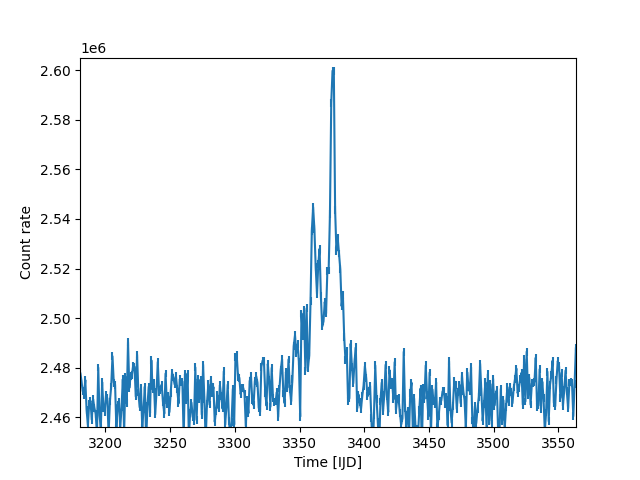

Text(0, 0.5, 'Count rate')

In [13]:
plt.errorbar(lc.data_unit[1].data['TIME'], lc.data_unit[1].data['RATE'], yerr=lc.data_unit[1].data['ERROR'])
plt.xlabel('Time [IJD]')
plt.ylabel('Count rate')

## Make another query

First look at the keys

In [14]:
descr = disp.get_product_description(instrument='isgri',product_name='isgri_spectrum')
descr

Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "GET /cdci/astrooda/dispatch-data/api/meta-data?instrument=isgri&product_type=isgri_spectrum HTTP/1.1" 200 1338
--------------
parameters for product isgri_spectrum and instrument isgri
unable to dig list, instance not a dict by <class 'list'>; object was [{'query_name': 'src_query'}, {'name': 'src_name', 'units': 'str', 'value': 'test'}, {'name': 'RA', 'units': 'deg', 'value': 0.0}, {'name': 'DEC', 'units': 'deg', 'value': 0.0}, {'name': 'T1', 'units': None, 'value': '2001-12-11T00:00:00.000'}, {'name': 'T2', 'units': None, 'value': '2001-12-11T00:00:00.000'}, {'name': 'token', 'units': 'str', 'value': None}]

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000, 

[[{'instrumet': 'isgri'},
  {'prod_dict': {'isgri_image': 'isgri_image_query',
    'isgri_lc': 'isgri_lc_query',
    'isgri_spectrum': 'isgri_spectrum_query',
    'spectral_fit': 'spectral_fit_query'}},
  '[{"query_name": "src_query"}, {"name": "src_name", "units": "str", "value": "test"}, {"name": "RA", "units": "deg", "value": 0.0}, {"name": "DEC", "units": "deg", "value": 0.0}, {"name": "T1", "units": None, "value": "2001-12-11T00:00:00.000"}, {"name": "T2", "units": None, "value": "2001-12-11T00:00:00.000"}, {"name": "token", "units": "str", "value": None}]',
  '[{"query_name": "isgri_parameters"}, {"name": "user_catalog", "units": "str", "value": None}, {"name": "scw_list", "units": "names_list", "value": []}, {"name": "selected_catalog", "units": "str", "value": None}, {"name": "radius", "units": "deg", "value": 5.0}, {"name": "max_pointings", "units": None, "value": 50}, {"name": "osa_version", "units": "str", "value": None}, {"name": "integral_data_rights", "units": "str", "val

### Extract an image on a limited number of pointigs
with the parameter max_pointings, we can get a random subset of available pointings
The most common use case is an image from which we want to derive the 
catalog of bright sources in the field of view

Note that we are giving the parameters as arguments.

In [15]:
image = disp.get_product(instrument="isgri", 
                     product="isgri_image", 
                     product_type="Real", 
                     osa_version='OSA11.0',
                    radius = 8,
                     RA=275.09142677,
                         DEC=7.18535523,
                     T1=58193.455,
                         T2=58246.892,
                         T_format= 'mjd',
                     max_pointings=10,
                     E1_keV=30.0,
                     E2_keV=80.0,
                     token=token
          )

Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "GET /cdci/astrooda/dispatch-data/api/par-names?instrument=isgri&product_type=isgri_image HTTP/1.1" 200 210
dig_list unable to literal_eval src_name; problem malformed node or string: <_ast.Name object at 0x7fcfcea18100>
dig_list unable to literal_eval RA; problem malformed node or string: <_ast.Name object at 0x7fcfcea18160>
dig_list unable to literal_eval DEC; problem malformed node or string: <_ast.Name object at 0x7fcfcea18130>
dig_list unable to literal_eval T1; problem malformed node or string: <_ast.Name object at 0x7fcfcea18730>
dig_list unable to literal_eval T2; problem malformed node or string: <_ast.Name object at 0x7fcfcea18be0>
dig_list unable to literal_eval token; problem malformed node or string: <_ast.Name object at 0x7fcfcea18760>
dig_list unable to literal_eval scw_list; problem malformed node or string: <_ast.Name object at 0x7fcfcea18d60>
dig_list

- waiting for remote response (since 2021-05-26 15:55:04), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 842, max for GET is 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "GET /cdci/astrooda/dispatch-data/run_analysis?osa_version=OSA11.0&radius=8&RA=275.09142677&DEC=7.18535523&T1=58193.455&T2=58246.892&T_format=mjd&max_pointings=10&E1_keV=30.0&E2_keV=80.0&token=<REDACTED>&instrument=isgri&product_type=isgri_image&query_type=Real&off_line=False&query_status=submitted&session_id=WKZ8SMLOWBJK6E2K&dry_run=False&api=True&oda_api_version=1.1.11&job_id=6e99264cc7f57896 HTTP/1.1" 200 8835955
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896

... query status submitted => done
query COMPLETED SUCCESSFULLY (state done)
poll returing data: complete
query complete: terminating


In [9]:
#Let's look at the image
image.show()

ID=0 prod_name=mosaic_image_0_mosaic  meta_data: {'product': 'mosaic', 'instrument': 'isgri', 'src_name': '', 'query_parameters': '[{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"name": "detection_threshold", "units": "sigma", "value": 0.0}, {"name": "image_scale_min", "units": None, "value": None}, {"name": "image_scale_max", "units": None, "value": None}]'}

ID=1 prod_name=dispatcher_catalog_1  meta_data: 



In [16]:
#access it as an attribute
image.mosaic_image_0_mosaic

In [17]:
#Access it as liste memebr
data_collection._p_list[0]

In [18]:
#Minimum detection threshold and avoid including new sources
det_sigma = 8
include_new_sources = False

sources = image.dispatcher_catalog_1.table[image.dispatcher_catalog_1.table['significance'] >= det_sigma]

if len(sources) == 0:
    print('No sources in the catalog with det_sigma > %.1f' % det_sigma)
    

if not include_new_sources:
    ind = [not 'NEW' in ss for ss in sources['src_names']]
    clean_sources = sources[ind]
else:
    clean_sources = sources

#We copy back clean sources in the image data products
image.dispatcher_catalog_1.table = clean_sources

#We derive the catalog string for the spectrum !
api_cat_str=image.dispatcher_catalog_1.get_api_dictionary()

api_cat_str

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[17, 87], ["GRS 1915+105", "MAXI J1820+070"], [29.396455764770508, 1803.1607666015625], [288.799560546875, 275.0911865234375], [10.939922332763672, 7.185144901275635], [-32768, -32768], [2, 2], [0, 0], [0.0002800000074785203, 0.00041666667675599456]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U20"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

### Query a spectrum with the maximum number of available science windows

The maximum number of science windows that can be processed in a single query is 500, 
you should specify this in max_pointings. Otherwise the default value of 50 will be used.

Once the query is submitted, you will receive an email. You can now interrupt your query and wait for a second email when data will be ready.

In [ ]:
#We get a spectrum from all pointings
spectrum = disp.get_product(instrument="isgri", 
                 product="isgri_spectrum", 
                 product_type="Real", 
                 osa_version='OSA11.0',
                     RA=275.09142677,
                         DEC=7.18535523,
                    radius = 8,
                     T1=58193.455,
                         T2=58246.892,
                         T_format= 'mjd',
                     max_pointings=50,
                     token=token,
                 selected_catalog=api_cat_str)

Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "GET /cdci/astrooda/dispatch-data/api/par-names?instrument=isgri&product_type=isgri_spectrum HTTP/1.1" 200 152
dig_list unable to literal_eval src_name; problem malformed node or string: <_ast.Name object at 0x7fcfccebf340>
dig_list unable to literal_eval RA; problem malformed node or string: <_ast.Name object at 0x7fcfccebfb80>
dig_list unable to literal_eval DEC; problem malformed node or string: <_ast.Name object at 0x7fcfccebfe50>
dig_list unable to literal_eval T1; problem malformed node or string: <_ast.Name object at 0x7fcfccebfbe0>
dig_list unable to literal_eval T2; problem malformed node or string: <_ast.Name object at 0x7fcfccebf730>
dig_list unable to literal_eval token; problem malformed node or string: <_ast.Name object at 0x7fcfccebf3d0>
dig_list unable to literal_eval scw_list; problem malformed node or string: <_ast.Name object at 0x7fcfccebf850>
dig_l

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 \ the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 53 seconds (6.6/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:34:05), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 | the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 60 seconds (6.5/18); in 0 SCW so far; nod

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 / the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 121 seconds (6.3/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:35:13), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 - the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 128 seconds (6.3/18); in 0 SCW so far; n

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 \ the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 189 seconds (6.1/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:36:20), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7019
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 | the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 195 seconds (6.1/18); in 0 SCW so far; n

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 / the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 256 seconds (6.1/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:37:28), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 - the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 263 seconds (6/18); in 0 SCW so far; nod

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 \ the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 323 seconds (6/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:38:35), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 | the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 332 seconds (6/18); in 0 SCW so far; nodes

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 / the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 391 seconds (6/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:39:43), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 - the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 398 seconds (6/18); in 0 SCW so far; nodes

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 \ the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 458 seconds (5.9/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:40:50), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7019
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 | the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 464 seconds (5.9/18); in 0 SCW so far; n

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 / the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 525 seconds (5.9/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:41:56), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 - the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 531 seconds (5.9/18); in 0 SCW so far; n

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 \ the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 593 seconds (5.9/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:43:04), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 | the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 600 seconds (5.9/18); in 0 SCW so far; n

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 / the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 661 seconds (5.9/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:44:13), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 - the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 668 seconds (5.9/18); in 0 SCW so far; n

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 \ the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 731 seconds (5.9/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:45:22), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7019
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 | the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 737 seconds (5.9/18); in 0 SCW so far; n

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 / the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 801 seconds (5.9/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:46:32), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 - the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 808 seconds (5.9/18); in 0 SCW so far; n

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 \ the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 886 seconds (6/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:47:58), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 | the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 893 seconds (6/18); in 0 SCW so far; nodes

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 / the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 956 seconds (6/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:49:07), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 - the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 963 seconds (6/18); in 0 SCW so far; nodes

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 \ the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 1025 seconds (6/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:50:17), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7019
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 | the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 1032 seconds (6/18); in 0 SCW so far; nod

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 / the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 1090 seconds (6/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:51:22), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 - the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 1097 seconds (6/18); in 0 SCW so far; nod

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 \ the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 1157 seconds (6/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:52:29), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7019
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 | the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 1164 seconds (6/18); in 0 SCW so far; nod

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 / the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 1225 seconds (5.9/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:53:36), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 - the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 1232 seconds (5.9/18); in 0 SCW so far;

job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 \ the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 1292 seconds (5.9/18); in 0 SCW so far; nodes (2): 0 computed 2 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-05-26 16:54:43), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
payload size 1605, max for GET is 1000
switching to POST request due to large payload: 1605 > 1000
Starting new HTTP connection (1): frontend.staging.internal.odahub.io:80
http://frontend.staging.internal.odahub.io:80 "POST /cdci/astrooda/dispatch-data/run_analysis HTTP/1.1" 200 7020
job: WKZ8SMLOWBJK6E2K session 6e99264cc7f57896
 | the job is working remotely, please wait status=submitted job_id=6e99264c in 4 messages since 1298 seconds (5.9/18); in 0 SCW so far;

In [ ]:
#This is the source we inspect the spectrum for
src_name='MAXI J1820+070'

In [ ]:
#We select a particulr source
data_sel=data_collection.new_from_metadata('src_name',src_name)

In [ ]:
#We can save the files
data_sel.save_all_data()